## Задание

Распознайте рукописную цифру, написанную на листе от руки.
Последовательность шагов следующая:

*   На бумаге рисуем произвольную цифру (желательно нарисовать цифру размером не 
более 5 * 5 мм и без наклона. В занятии нейронка обучалась на цифрах американских студентов. Эти цифры были написаны на тетрадных листах в клетку и имели схожий размер).
*   Фотографируем. Загружаем фото в Collaboratory.
*   С помощью функции image.load_img(path, target_size=(28, 28), color_mode = ‘grayscale’) загружаем картинку в переменную.
*   С помощью функции image.img_to_array(img) преобразуем изображение в numpy-массив.
*   Выполняем инверсию цветов, нормирование и решейп массива.
*   Выполняем распознавание собственной рукописной цифры.

Примечание: точность распознавания рукописных цифр может быть достаточно низкой, т.к. рукописные цифры после преобразований хоть и похожи на содержащиеся в базе, но могут отличаться по конфигурации, толщине линий и т.д.


In [1]:
from tensorflow.keras.datasets import mnist     # Библиотека с базой рукописных цифр
from tensorflow.keras.models import Sequential  # Подключение класса создания модели Sequential
from tensorflow.keras.layers import Dense       # Подключение класса Dense - полносвязный слой
from tensorflow.keras import utils              # Утилиты для подготовки данных
import numpy as np                              # Работа с массивами
import matplotlib.pyplot as plt                 # Отрисовка изображений

# Отрисовка изображений в ячейках ноутбука
%matplotlib inline 

## Стандартный датасет с цифрами из keras

In [2]:
# Загрузка из облака данных Mnist
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
type(y_train_org)

numpy.ndarray

In [ ]:
# Вывод формы данных для обучения
x_train_org.shape

(60000, 28, 28)

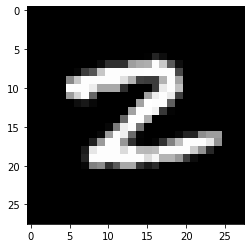

In [ ]:
# Номер картинки
n = 143

# Отрисовка картинки
plt.imshow(x_train_org[n], cmap='gray')

# Вывод n-й картинки
plt.show()

In [ ]:
# Изменение формы входных картинок с 28х28 на 784
# первая ось остается без изменения, остальные складываются в вектор
x_train = x_train_org.reshape(x_train_org.shape[0], -1)   
x_test = x_test_org.reshape(x_test_org.shape[0], -1)   

# Проверка результата
print(f'Форма обучающих данных: {x_train_org.shape} -> {x_train.shape}')
print(f'Форма  тестовых данных: {x_test_org.shape} -> {x_test.shape}')

Форма обучающих данных: (60000, 28, 28) -> (60000, 784)
Форма  тестовых данных: (10000, 28, 28) -> (10000, 784)


In [ ]:
# Нормализация входных картинок
# Преобразование x_train в тип float32 (числа с плавающей точкой) и нормализация
x_train = x_train.astype('float32') / 255.

# Преобразование x_test в тип float32 (числа с плавающей точкой) и нормализация
x_test = x_test.astype('float32') / 255.

In [ ]:
# Задание константы количества распознаваемых классов
CLASS_COUNT = 10

# Преобразование ответов в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org, CLASS_COUNT)
y_test = utils.to_categorical(y_test_org, CLASS_COUNT)

In [ ]:
# Вывод формы y_train
# 60 тысяч примеров, каждый длины 10 по числу классов
print(y_train.shape)

(60000, 10)


In [ ]:
# Вывод примера одного выходного вектора
print(y_train[0]) 

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Создание модели

In [ ]:
# Создание последовательной модели
model = Sequential()

# Добавление полносвязного слоя на 800 нейронов с relu-активацией
model.add(Dense(800, input_dim=784, activation='relu')) 

# Добавление полносвязного слоя на 400 нейронов с relu-активацией
model.add(Dense(400, activation='relu')) 

# Добавление полносвязного слоя с количеством нейронов по числу классов с softmax-активацией
model.add(Dense(CLASS_COUNT, activation='softmax')) 

# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Вывод структуры модели
print(model.summary())


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 800)               628000    
                                                                 
 dense_7 (Dense)             (None, 400)               320400    
                                                                 
 dense_8 (Dense)             (None, 10)                4010      
                                                                 
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.fit(x_train,        # обучающая выборка, входные данные
          y_train,        # обучающая выборка, выходные данные
          batch_size=128, # кол-во примеров, которое обрабатывает нейронка перед одним изменением весов
          epochs=15,      # количество эпох, когда нейронка обучается на всех примерах выборки
          verbose=1)      # 0 - не визуализировать ход обучения, 1 - визуализировать

Epoch 1/15
469/469 [==============================] - 9s 18ms/step - loss: 0.2085 - accuracy: 0.9377
Epoch 2/15
469/469 [==============================] - 8s 17ms/step - loss: 0.0775 - accuracy: 0.9749
Epoch 3/15
469/469 [==============================] - 8s 17ms/step - loss: 0.0465 - accuracy: 0.9853
Epoch 4/15
469/469 [==============================] - 8s 17ms/step - loss: 0.0345 - accuracy: 0.9887
Epoch 5/15
469/469 [==============================] - 8s 18ms/step - loss: 0.0247 - accuracy: 0.9917
Epoch 6/15
469/469 [==============================] - 8s 17ms/step - loss: 0.0216 - accuracy: 0.9929
Epoch 7/15
469/469 [==============================] - 8s 17ms/step - loss: 0.0186 - accuracy: 0.9938
Epoch 8/15
469/469 [==============================] - 9s 19ms/step - loss: 0.0155 - accuracy: 0.9951
Epoch 9/15
469/469 [==============================] - 8s 17ms/step - loss: 0.0141 - accuracy: 0.9955
Epoch 10/15
469/469 [==============================] - 8s 17ms/step - loss: 0.0154 - accura

In [ ]:
model.save_weights('model.h5')
model.load_weights('model.h5')

## Распознавание цифр написанных мной

In [ ]:
from PIL import Image, ImageOps

from google.colab import drive
import glob
import os
# example of loading an image with the Keras API
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
path_to_data = '/content/drive/MyDrive/' 
Unique_Labels_List = os.listdir(path_to_data)

In [ ]:
Unique_Labels_List

['Новый документ.gdoc',
 'Моменты.pdf',
 'AMG4:Kirill Volkov:Research.gsheet',
 'франзуцское заявление на визу.pdf',
 'План поездки.gsheet',
 'Tourism startups competition.gsheet',
 '20181102_211148.jpg',
 '20181102_211747.jpg',
 '20181218_182025.jpg',
 'Резюме Кирилл Волков (2).pdf',
 'Kirill Volkov.jpeg',
 'Earth hour: WWF.jpg',
 'Ian Hill -Ambassador of NZ in Russia-min.jpg',
 'Potsdam Meetings-min.jpg',
 'Colab Notebooks',
 'Схема.gdoc',
 'MAH07636.MP4',
 'Checkio_second_island.ipynb',
 'hometask3.ipynb',
 'Таблица откликов.gsheet',
 'SBTestCase.ipynb',
 'Резюме Кирилл Волков (1).pdf',
 'Резюме Кирилл Волков.pdf',
 'DSC07160.jpeg',
 'DSC04224.jpeg',
 'DSC08188.jpeg',
 'Алгоритм оценки бизнес-идей по критериям.gsheet',
 'Опросник для сегментации_5814.gform',
 'Опросник для сегментации_5812.gform',
 'Опросник для сегментации_7230.gform',
 'Опросник для сегментации_5651.gform',
 'Опросник для сегментации_5621.gform',
 'Опросник для сегментации_5691.gform',
 'digits']

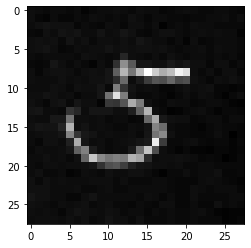

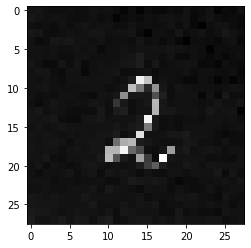

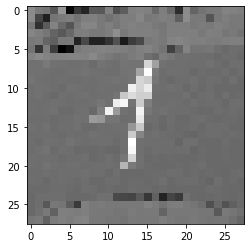

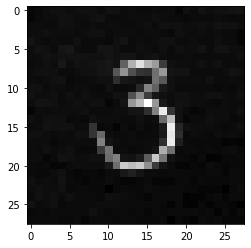

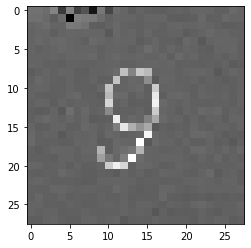

In [ ]:
col_dir = '/content/drive/MyDrive/digits/'
digits = []

for filename in glob.iglob(col_dir + '**/*.jpeg', recursive=True):
    digit = load_img(filename, target_size=(28, 28), color_mode = 'grayscale')
    digit_invert = ImageOps.invert(digit)
    
    #save digit to list
    digits.append(digit_invert)

    #plot digit
    plt.imshow(digit_invert, cmap='gray')
    plt.show()

In [ ]:
#Converts a PIL Image instance to a Numpy array
digits = [img_to_array(digit) for digit in digits]

#clean all noisy pixels
digits = np.array(digits)
digits[digits < 127] = 0
digits[digits >= 127] = 1

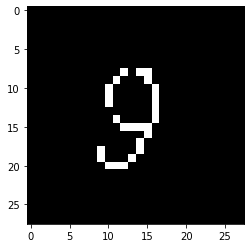

In [ ]:
# processed number's image
for digit in digits:
    plt.imshow(digit[:,:,0], cmap='gray')

In [ ]:
#normalize values 
digits = [digit/digit.max() for digit in digits]

#reshape from 28 * 28 to 784
#list to numpy array
digits = np.array(digits)
digits = digits.reshape(digits.shape[0], -1) 

# Add one axis in the begining to let NN recognize the example
# Массив из одного примера, так как нейронка принимает именно массивы примеров (батчи) для распознавания
digits = [np.expand_dims(digit, axis=0) for digit in digits]

In [ ]:
digits = np.array(digits)
digits.shape

(5, 1, 784)

In [ ]:
# make prediction
predictions = []
for digit in digits:
    prediction = model.predict(digit)
    print(prediction)
    predictions.append(prediction)

[[3.0756104e-07 3.2783754e-07 9.1841557e-08 2.6682303e-05 8.4495719e-07
  9.4540983e-01 1.4286033e-08 4.0115606e-06 2.7859773e-05 5.4530047e-02]]
[[6.3916985e-07 8.9980222e-07 9.9985242e-01 1.2471483e-04 4.4425434e-08
  4.7103322e-07 2.4740432e-09 3.1244161e-07 6.2663169e-08 2.0408124e-05]]
[[2.4574064e-16 9.9999821e-01 3.5467512e-10 8.8064491e-14 1.6698000e-06
  1.1714690e-15 1.8021352e-15 1.1335909e-07 1.0250129e-09 7.2469347e-13]]
[[4.5814190e-07 2.6947575e-05 2.4328927e-05 9.9931324e-01 8.5937955e-08
  6.1645743e-04 6.0612820e-08 2.9223168e-06 1.5241971e-05 2.8278814e-07]]
[[3.1325809e-04 7.3578852e-01 1.4463833e-01 1.7018900e-05 9.6268520e-02
  1.7508479e-04 3.7394137e-05 1.1028642e-02 7.9701757e-03 3.7630678e-03]]


In [ ]:
# check the results
correct_answers = [5,2,1,3,9]
for pred, correct_answer in zip(predictions, correct_answers):
    correct = np.argmax(pred)==correct_answer
    print(np.argmax(pred), correct_answer, correct)

5 5 True
2 2 True
1 1 True
3 3 True
1 9 False
